In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix

In [43]:
data, meta = arff.loadarff("Training Dataset.arff")

In [44]:
df = pd.DataFrame(data)
df = df.map(lambda x: x.decode() if isinstance(x, bytes) else x)
df.to_csv("phishing.csv", index=False)
df=pd.read_csv("phishing.csv")

In [45]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [46]:
df.shape

(11055, 31)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [48]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
df.nunique()

,0
having_IP_Address,2
URL_Length,3
Shortining_Service,2
having_At_Symbol,2
double_slash_redirecting,2
Prefix_Suffix,2
having_Sub_Domain,3
SSLfinal_State,3
Domain_registeration_length,2
Favicon,2


In [50]:
df.isnull().sum()

,0
having_IP_Address,0
URL_Length,0
Shortining_Service,0
having_At_Symbol,0
double_slash_redirecting,0
Prefix_Suffix,0
having_Sub_Domain,0
SSLfinal_State,0
Domain_registeration_length,0
Favicon,0


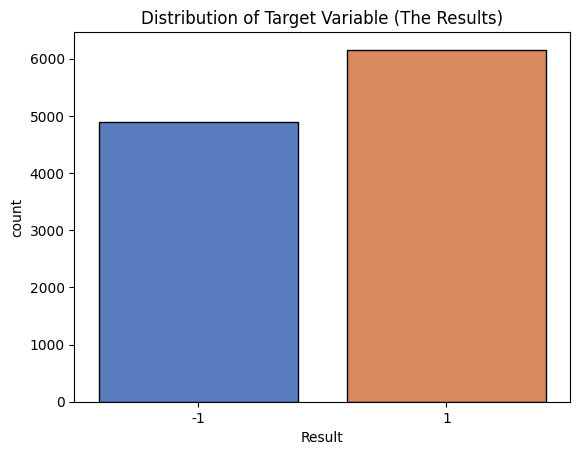

The visualization shows 4898 harmful URLs and 6157 harmless URLs.
Percentage harmful: 44.31%, Percentage harmless: 55.69%


In [51]:
color = sns.color_palette("muted", 2)
sns.countplot(x='Result', hue='Result', data=df, palette=color, edgecolor='black', legend=False)
plt.title('Distribution of Target Variable (The Results)')
plt.show()

harmful_count = df[df['Result'] == -1].shape[0]
harmless_count = df[df['Result'] == 1].shape[0]
total = harmful_count + harmless_count
print(f"The visualization shows {harmful_count} harmful URLs and {harmless_count} harmless URLs.")
print(f"Percentage harmful: {harmful_count/total:.2%}, Percentage harmless: {harmless_count/total:.2%}")

array([[<Axes: title={'center': 'having_IP_Address'}>,
        <Axes: title={'center': 'URL_Length'}>,
        <Axes: title={'center': 'Shortining_Service'}>,
        <Axes: title={'center': 'having_At_Symbol'}>,
        <Axes: title={'center': 'double_slash_redirecting'}>,
        <Axes: title={'center': 'Prefix_Suffix'}>],
       [<Axes: title={'center': 'having_Sub_Domain'}>,
        <Axes: title={'center': 'SSLfinal_State'}>,
        <Axes: title={'center': 'Domain_registeration_length'}>,
        <Axes: title={'center': 'Favicon'}>,
        <Axes: title={'center': 'port'}>,
        <Axes: title={'center': 'HTTPS_token'}>],
       [<Axes: title={'center': 'Request_URL'}>,
        <Axes: title={'center': 'URL_of_Anchor'}>,
        <Axes: title={'center': 'Links_in_tags'}>,
        <Axes: title={'center': 'SFH'}>,
        <Axes: title={'center': 'Submitting_to_email'}>,
        <Axes: title={'center': 'Abnormal_URL'}>],
       [<Axes: title={'center': 'Redirect'}>,
        <Axes: tit

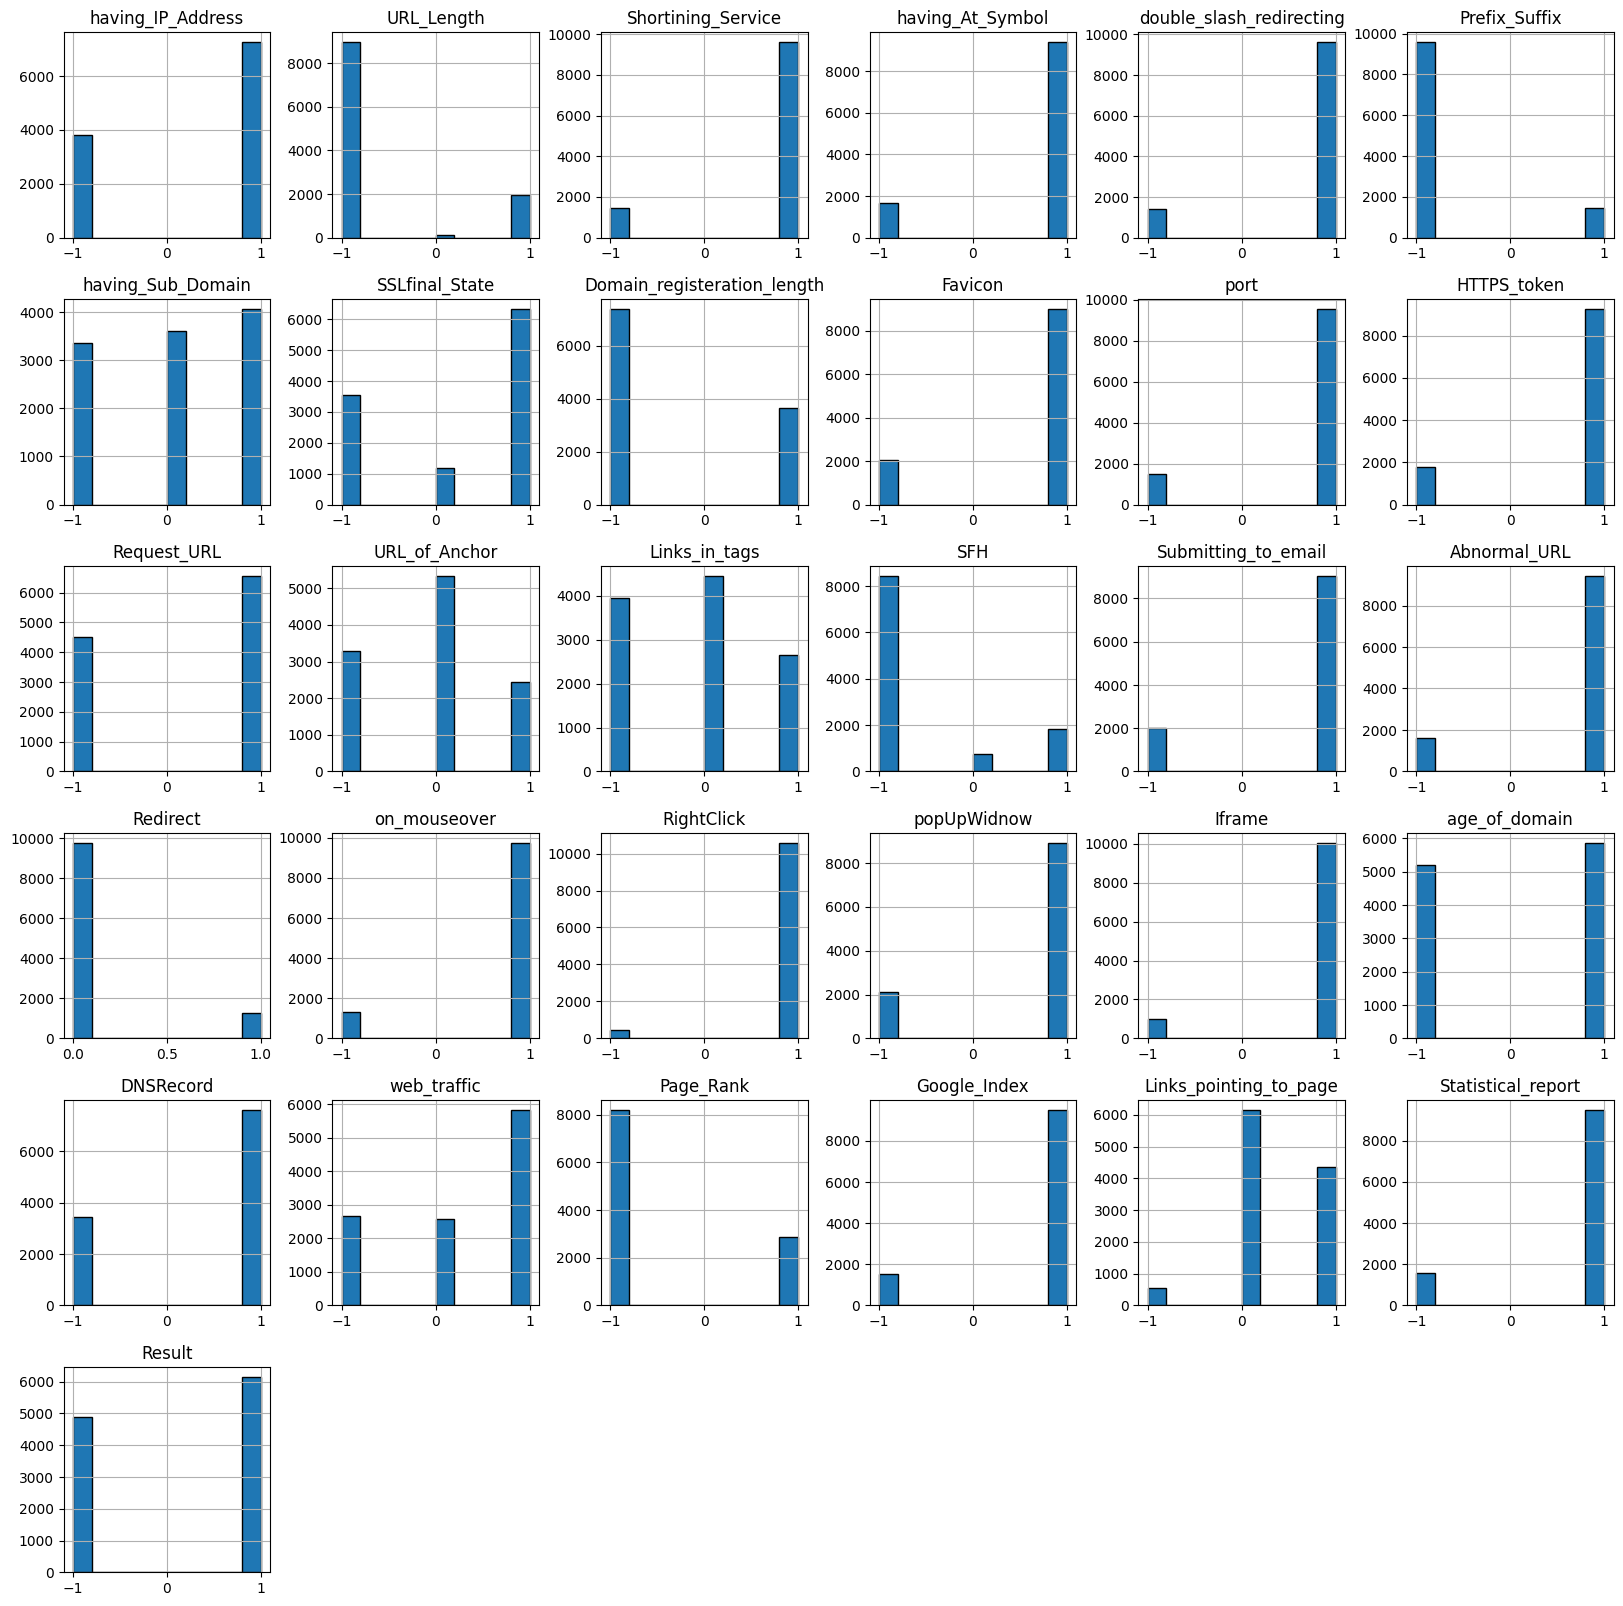

In [52]:
df.hist(edgecolor='black', figsize=(20,20))

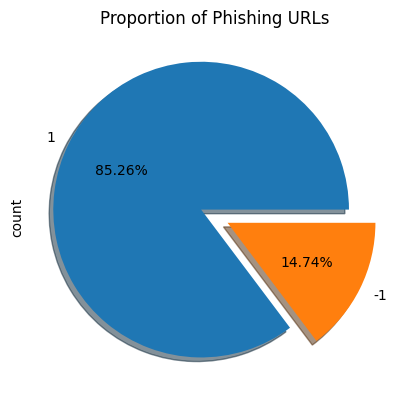

The pie chart indicates that the dataset contains a larger proportion of fraudulent URLs.


In [53]:
df['Abnormal_URL'].value_counts().plot(
    kind='pie',
    explode=[0.1, 0.1],
    autopct='%1.2f%%',
    shadow=True
)
plt.title("Proportion of Phishing URLs")
plt.show()

print("The pie chart indicates that the dataset contains a larger proportion of fraudulent URLs.")

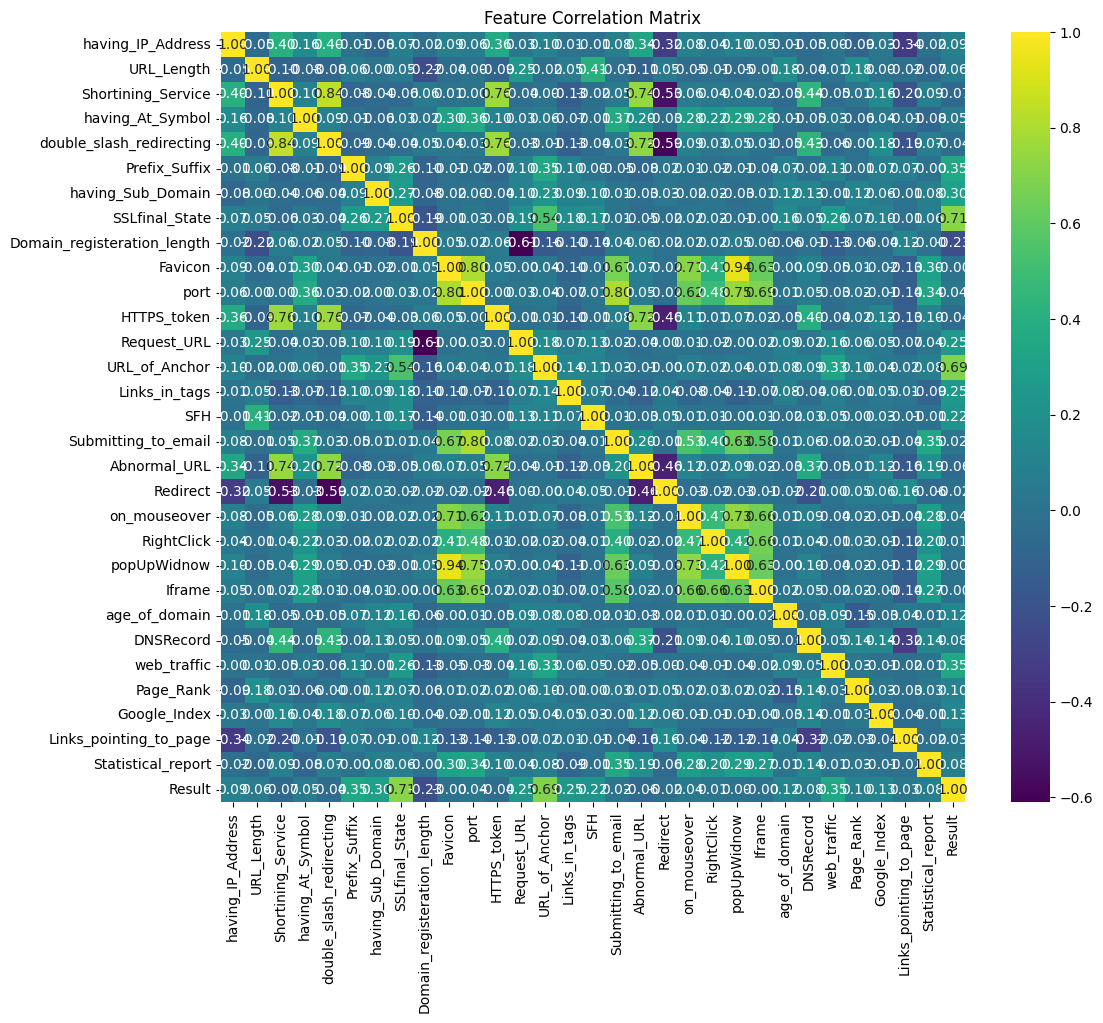

The heatmap illustrates the degree of correlation between various features in the dataset.


In [54]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

print("The heatmap illustrates the degree of correlation between various features in the dataset.")

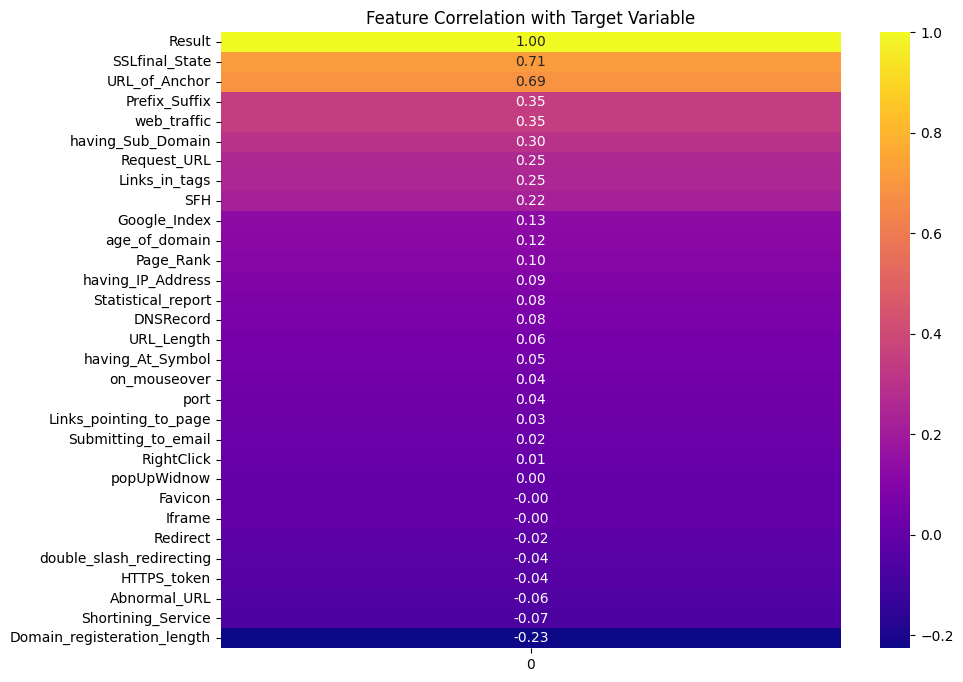

The analysis reveals that features such as "web_traffic" and "https" have a strong relationship with determining whether a URL is malicious.


In [55]:
corr_with_target = df.corrwith(df['Result'])

# Visualizing the correlation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_with_target.sort_values(ascending=False).to_frame(),
    cmap='plasma',  # Updated to use the 'plasma' color palette for a fresh look
    annot=True,
    fmt=".2f"
)
plt.title('Feature Correlation with Target Variable')
plt.show()

print(
    'The analysis reveals that features such as "web_traffic" and "https" '
    'have a strong relationship with determining whether a URL is malicious.'
)

The histogram demonstrates that the majority of URLs are lengthy, indicating a higher prevalence of fraudulent URLs in the dataset.


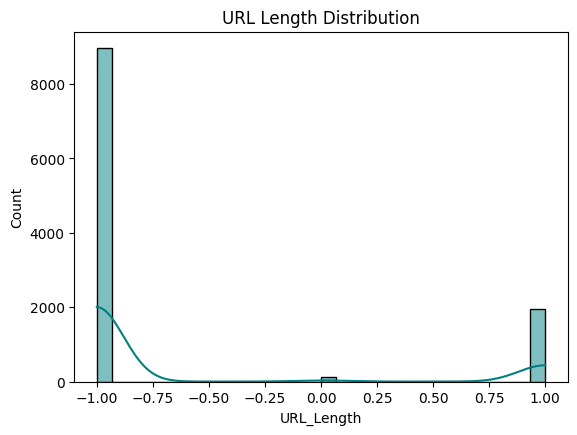

In [56]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['URL_Length'], bins=30, kde=True, color='teal')  # Changed color to 'teal'
plt.title('URL Length Distribution')

print(
    'The histogram demonstrates that the majority of URLs are lengthy, '
    'indicating a higher prevalence of fraudulent URLs in the dataset.'
)

In [57]:
X = df.drop(["Result"], axis=1)
Y = df["Result"]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [59]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8844, 30), (2211, 30), (8844,), (2211,))

In [60]:
# Setting up the K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier()

# Specifying the range of hyperparameter values for tuning
knn_params = {'n_neighbors': [3, 5, 7, 9, 11, 13]}

# Applying GridSearchCV to identify the optimal hyperparameters
knn_grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_params,
    refit=True,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)

In [61]:
# Training the KNN model using grid search
knn_grid_search.fit(X_train, Y_train)

# Extracting the optimal hyperparameters
knn_best_params = knn_grid_search.best_params_
print("Optimal KNN Hyperparameters: ", knn_best_params)

# Retrieving the highest cross-validation accuracy achieved by the KNN model
knn_best_score = knn_grid_search.best_score_
print("Best Cross-Validated Score for KNN: ", knn_best_score)

Optimal KNN Hyperparameters:  {'n_neighbors': 3}
Best Cross-Validated Score for KNN:  0.941090525874219


In [62]:
# Creating a new KNN model with the best hyperparameter
knn_best_model = KNeighborsClassifier(n_neighbors=list(knn_best_params.values())[0])

# Fitting the best KNN model with the training data
knn_best_model.fit(X_train, Y_train)

# Predicting using the test dataset with the best model
knn_y_pred = knn_best_model.predict(X_test)

In [63]:
# Displaying the accuracy of the optimized KNN model
knn_accuracy = accuracy_score(Y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy:.3f}")

# Displaying the precision of the optimized KNN model
knn_precision = precision_score(Y_test, knn_y_pred)
print(f"KNN Precision: {knn_precision:.3f}")

# Displaying the recall of the optimized KNN model
knn_recall = recall_score(Y_test, knn_y_pred)
print(f"KNN Recall: {knn_recall:.3f}")

# Displaying the F1 score of the optimized KNN model
knn_f1 = f1_score(Y_test, knn_y_pred)
print(f"KNN F1 Score: {knn_f1:.3f}")

# Displaying the error rate of the optimized KNN model
knn_error = 1 - knn_accuracy
print(f"KNN Error Rate: {knn_error:.3f}")

KNN Accuracy: 0.942
KNN Precision: 0.952
KNN Recall: 0.942
KNN F1 Score: 0.947
KNN Error Rate: 0.058


In [64]:
# Generating and displaying the confusion matrix for the KNN model
knn_con_matrix = confusion_matrix(Y_test, knn_y_pred)
print(f"Confusion Matrix for KNN Model:\n{knn_con_matrix}")

Confusion Matrix for KNN Model:
[[ 929   58]
 [  71 1153]]


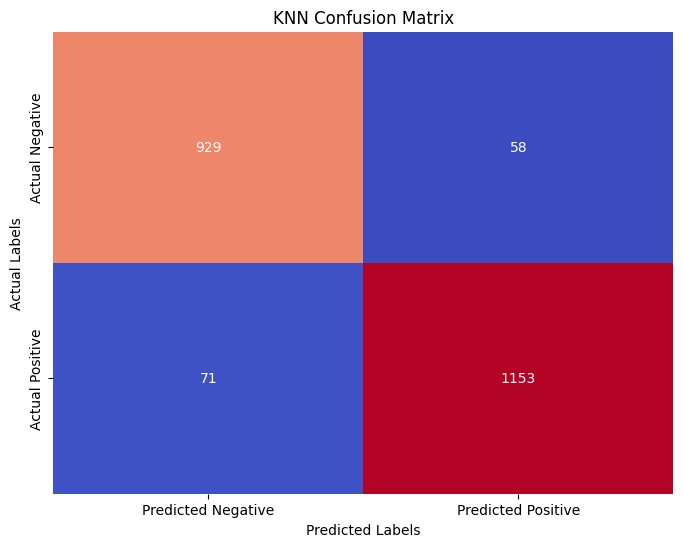

In [65]:
# Visualizing the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(knn_con_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [66]:
# Setting up the Random Forest (RF) classifier
rf_model = RandomForestClassifier()

# Specifying the hyperparameter grid for tuning the RF model
rf_param_grid = {
    'n_estimators': [50, 100, 150],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples required to be at a leaf node
}

# Setting up GridSearchCV to identify the optimal hyperparameters for the RF model
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy'
)

In [67]:
# Training the Random Forest model
rf_grid_search.fit(X_train, Y_train)

# Retrieving the optimal hyperparameters
rf_best_params = rf_grid_search.best_params_
print("Optimal Hyperparameters for Random Forest: ", rf_best_params)

# Retrieving the highest cross-validation accuracy score achieved
rf_best_score = rf_grid_search.best_score_
print("Best Cross-Validation Accuracy for Random Forest: ", rf_best_score)

Optimal Hyperparameters for Random Forest:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation Accuracy for Random Forest:  0.9690180816423626


In [68]:
# Random Forest model using the optimal hyperparameters obtained from GridSearchCV
best_rf_model = RandomForestClassifier(
    n_estimators=rf_best_params['n_estimators'],
    max_depth=rf_best_params['max_depth'],
    min_samples_split=rf_best_params['min_samples_split'],
    min_samples_leaf=rf_best_params['min_samples_leaf']
)

In [69]:
# Training the optimized Random Forest model on the training dataset
best_rf_model.fit(X_train, Y_train)

# Making predictions on the test dataset using the trained model
rf_y_pred = best_rf_model.predict(X_test)

In [70]:
# Displaying the accuracy of the Random Forest model
rf_accuracy = accuracy_score(Y_test, rf_y_pred)
print(f"Accuracy of Random Forest Model: {rf_accuracy: .3f}")

# Displaying the precision of the Random Forest model
rf_precision = precision_score(Y_test, rf_y_pred)
print(f"Precision of Random Forest Model: {rf_precision: .3f}")

# Displaying the recall of the Random Forest model
rf_recall = recall_score(Y_test, rf_y_pred)
print(f"Recall of Random Forest Model: {rf_recall: .3f}")

# Displaying the F1 score of the Random Forest model
rf_f1 = f1_score(Y_test, rf_y_pred)
print(f"F1 Score of Random Forest Model: {rf_f1: .3f}")

# Displaying the error rate of the Random Forest model
rf_error = 1 - rf_accuracy
print(f"Error Rate of Random Forest Model: {rf_error: .3f}")

Accuracy of Random Forest Model:  0.973
Precision of Random Forest Model:  0.974
Recall of Random Forest Model:  0.978
F1 Score of Random Forest Model:  0.976
Error Rate of Random Forest Model:  0.027


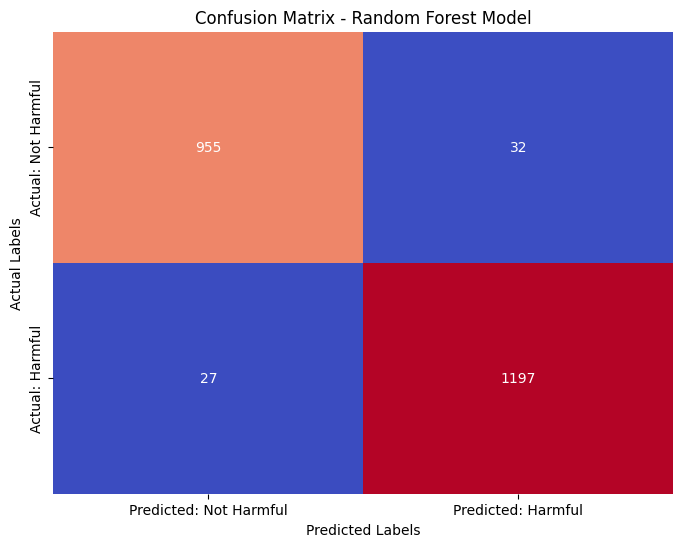

In [71]:
# Generating a confusion matrix for the Random Forest model
rf_con_matrix = confusion_matrix(Y_test, rf_y_pred)

# Visualizing the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_con_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted: Not Harmful', 'Predicted: Harmful'],
            yticklabels=['Actual: Not Harmful', 'Actual: Harmful'])
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [72]:
# Initializing the Support Vector Machine (SVM) model
svm_model = SVC()

# Defining a range of hyperparameters for SVM tuning
svm_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Different types of kernel functions
    'gamma': ['scale', 'auto']
}

# Setting up GridSearchCV to perform hyperparameter optimization for the SVM model
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, scoring='accuracy')

In [41]:
# Fitting the SVM grid search to the training data
svm_grid_search.fit(X_train, Y_train)

# Getting the best hyperparameters after the grid search
svm_best_params = svm_grid_search.best_params_
print("SVM Best Hyperparameters: ", svm_best_params)

# Getting the best cross-validation score from the grid search
svm_best_score = svm_grid_search.best_score_
print("SVM Best Score: ", svm_best_score)

SVM Best Hyperparameters:  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best Score:  0.9646092584966326
SVM Best Hyperparameters:  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best Score:  0.9646092584966326


In [72]:
# Creating an SVM model with the best hyperparameters
best_svm_model = SVC(
    C=svm_best_params['C'],
    kernel=svm_best_params['kernel'],
    gamma=svm_best_params['gamma']
)

In [77]:
svm_model = SVC()
svm_model.fit(X_train, Y_train)

svm_y_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(Y_test, svm_y_pred))

SVM Accuracy: 0.9466304839439168


SVM Accuracy: 0.9678878335594754
SVM Precision: 0.9660468876313663
SVM Recall: 0.9763071895424836
SVM F1: 0.971149939049167
SVM Error: 0.032112166440524614


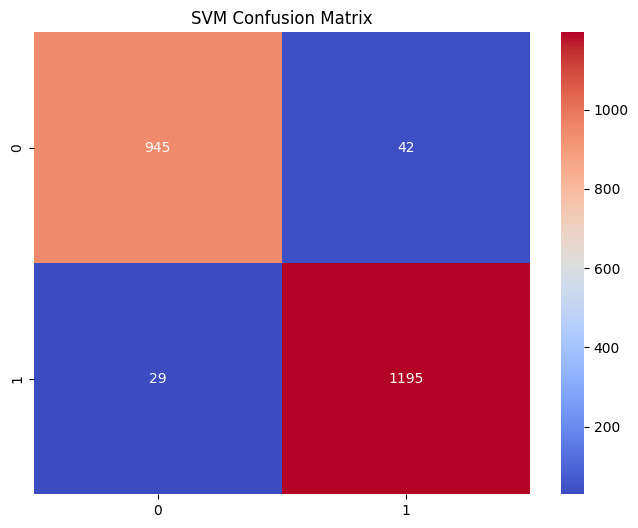

In [78]:

from sklearn.svm import SVC

# Train SVM model (using best params you already found)
best_svm_model = SVC(C=100, kernel='rbf', gamma='scale')
best_svm_model.fit(X_train, Y_train)

# Predictions
svm_y_pred = best_svm_model.predict(X_test)

# Metrics
svm_accuracy = accuracy_score(Y_test, svm_y_pred)
svm_precision = precision_score(Y_test, svm_y_pred)
svm_recall = recall_score(Y_test, svm_y_pred)
svm_f1 = f1_score(Y_test, svm_y_pred)
svm_error = 1 - svm_accuracy

print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1:", svm_f1)
print("SVM Error:", svm_error)

# Confusion matrix
svm_con_matrix = confusion_matrix(Y_test, svm_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(svm_con_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("SVM Confusion Matrix")
plt.show()


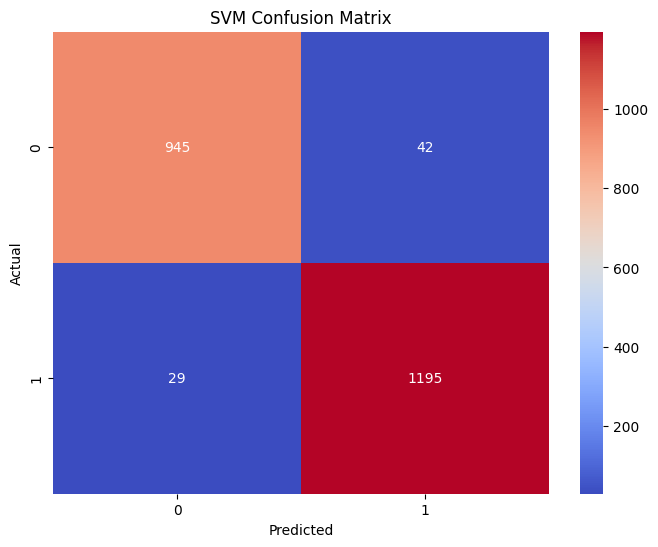

In [79]:

# Ensure SVM model exists
best_svm_model = SVC(C=100, kernel='rbf', gamma='scale')
best_svm_model.fit(X_train, Y_train)

svm_y_pred = best_svm_model.predict(X_test)

svm_con_matrix = confusion_matrix(Y_test, svm_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(svm_con_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [80]:

# Make sure SVM metrics exist
best_svm_model = SVC(C=100, kernel='rbf', gamma='scale')
best_svm_model.fit(X_train, Y_train)

svm_y_pred = best_svm_model.predict(X_test)

svm_accuracy = accuracy_score(Y_test, svm_y_pred)
svm_precision = precision_score(Y_test, svm_y_pred)
svm_recall = recall_score(Y_test, svm_y_pred)
svm_f1 = f1_score(Y_test, svm_y_pred)
svm_error = 1 - svm_accuracy

# Creating metrics dictionary
metrics_dict = {
    'KNN': [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_error],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_error],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_error]
}

metrics_df = pd.DataFrame(
    metrics_dict,
    index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Error']
)

metrics_df


,KNN,Random Forest,SVM
Accuracy,0.941655,0.973315,0.967888
Precision,0.952106,0.973963,0.966047
Recall,0.941993,0.977941,0.976307
F1 Score,0.947023,0.975948,0.971150
Error,0.058345,0.026685,0.032112


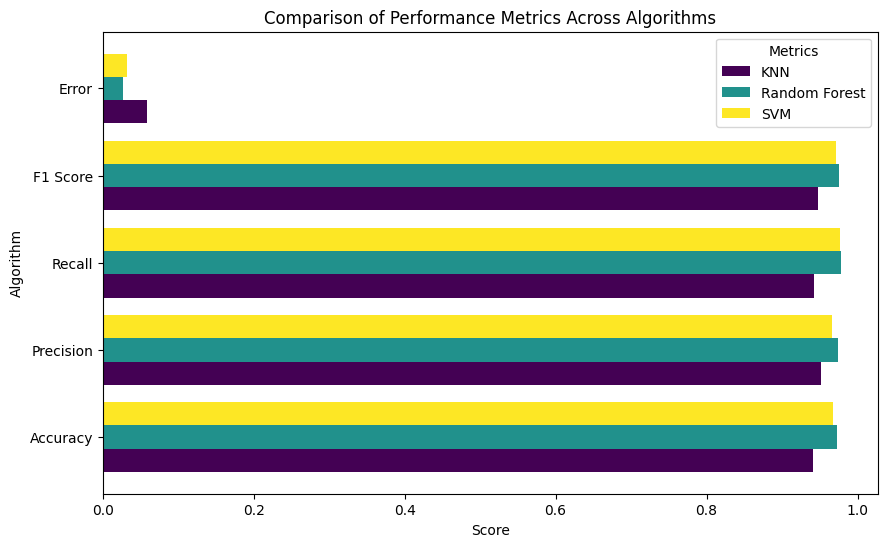

In [81]:
# Plotting a horizontal bar chart to visualize the performance metrics of each algorithm
metrics_df.plot(kind='barh', figsize=(10, 6), colormap='viridis', width=0.8)
plt.title('Comparison of Performance Metrics Across Algorithms')
plt.xlabel('Score')
plt.ylabel('Algorithm')
plt.legend(title='Metrics')
plt.show()